In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom

In [2]:
fparams =  {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'font.size': 20,
            'legend.fontsize': 18,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}
plt.rcParams.update(fparams)

$p_k(\tau) = \sum\limits_{i=1}^{\dfrac{n!}{k!(n-k)!}} |\langle k i | \psi(\tau) \rangle|^2 = \sum\limits_{i=1}^{\dfrac{n!}{k!(n-k)!}} |\langle k i | \exp(- i H \tau) | gs \rangle|^2$

vs

$p_k^{\,\beta} = \dfrac{1}{Z} \sum\limits_{i=1}^{\dfrac{n!}{k!(n-k)!}} \langle k i | \exp(-\beta H_0  | k i \rangle $

the temperature is found from

$\dfrac{\overline{\langle S^2 \rangle}-\overline{\langle S \rangle}^{\,2}}{\overline{\langle S \rangle}} = - \dfrac{\sum\limits_{i=1}^n\left(1 - \tanh^2 \dfrac{\beta \omega_i}{2}\right)}{2\sum\limits_{i=1}^n \tanh \dfrac{\beta \omega_i}{2}} \Rightarrow \beta J$

$\overline{\cal O}$ -- time average of $\cal O$ over the equilibrium regime

In [3]:
%run "C:\Users\Nick\Projects\thermalization_sim\new\thermal_state.py" 

In [4]:
def fluct(x, n, os):
    f_up = - 0.5 * (n  - np.sum(np.tanh(0.5 * x * os) ** 2)) 
    f_down = np.sum(np.tanh(0.5 * x * os))
    f = f_up / f_down
    return f

In [20]:
num = [4, 5, 6, 7]
nr = 100 # -- number of realizations
omega_min = 0.48 
omega_max = 0.72

time = np.load('data/time.npy', allow_pickle = True)

omegas = {}
p = {}
pav = {}
S = {}
SS2 = {}
Sav = {}
S2av = {}
VarS = {}
omegas_print = {} 
omega_mean =  {} 

for n in range(len(num)):
    omegas[n] = np.load('data/omegas_N={}_omega_min={}_omega_max={}.npy.npy'.format(num[n], omega_min, omega_max), allow_pickle = True)
    p[n] = np.load('data/p_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    pav[n] = np.load('data/pav_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    S[n] = np.load('data/S_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    SS2[n] = np.load('data/SS2_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    Sav[n] = np.load('data/Sav_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    S2av[n] = np.load('data/S2av_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    VarS[n] = np.load('data/VarS_N={}_nr={}_omega_min={}_omega_max={}.npy'.format(num[n], nr, omega_min, omega_max), allow_pickle = True)
    omegas_print[n] = list(np.sort(np.round(omegas[n], 3)))
    omega_mean[n] = np.sum(omegas[n]) / len(omegas[n])

In [29]:
num_ind = 0
print(omegas_print[num_ind])
print(omega_mean[num_ind])

[0.48, 0.56, 0.64, 0.72]
0.6


In [30]:
num_ind = 0
dt_ind = 50
ones_arr = np.array([1 for i in range(len(time))])
print(time[dt_ind])
print(1 / omega_mean[num_ind])

S_erg = {}
VarS_erg = {}
beta = {}

beta_list = np.linspace(0.01,10,1999)
for n in range(len(num)):
    S_eq = Sav[n][dt_ind:]
    S_erg_v = np.sum(S_eq) / len(S_eq)
    S_erg[n] = S_erg_v * ones_arr
    VarS_erg_v = np.sum(S2av[n][dt_ind:]) / len(S_eq) - (S_erg_v + num[n] / 2) **2
    VarS_erg[n] = VarS_erg_v * ones_arr
    c = VarS_erg_v / S_erg_v
    print(c)
    delta_list = []
    for m in range(len(beta_list)):
        delta_list.append(np.abs(fluct(beta_list[m], num[num_ind], omegas[num_ind]) - c))
    ind_min = delta_list.index(min(delta_list)) 
    beta[n] = beta_list[ind_min]
    print(beta[n], min(delta_list))    

2.5
1.6666666666666667
-1.314167586922212
1.17 0.0005429090085471433
-1.443734858603757
1.08 0.0028022682412365274
-1.5289023394841577
1.0250000000000001 0.0004678064600671661
-1.7346664665057028
0.915 0.0011393996267277107


In [15]:
#fig, ax = plt.subplots()
#ax.set_xlabel(r'$N$')
#ax.set_ylabel(r'$\beta J$')
#ax.set_title(r'$n_r = $'+' ${}$'.format(nr))
#for n in range(len(num)):
#    ax.plot(num[n], beta[n] / omega,  'o', color = 'tab:blue')
#ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
#ax.tick_params(which='minor', direction="in")
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#plt.savefig('figs/T_nr={}_omega_min={}_omega_max={}.svg'.format(nr, omega_min, omega_max))

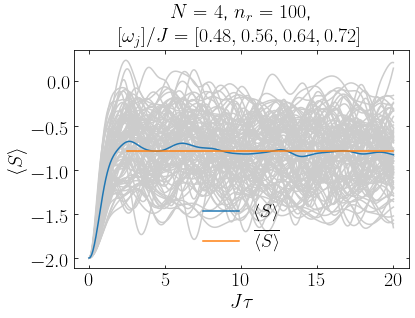

In [31]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$,\n'.format(nr)+r'$[\omega_j]/J = $'+' ${}$'.format(omegas_print[num_ind]))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], '-', color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}_omega_min={}_omega_max.svg'.format(num[num_ind], nr, , omega_min, omega_max))

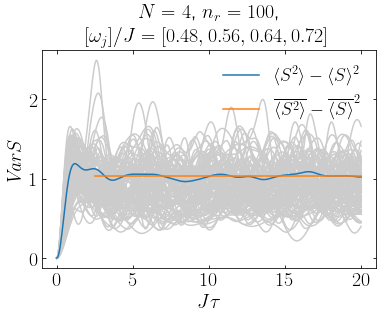

In [33]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$,\n'.format(nr)+r'$[\omega_j]/J = $'+' ${}$'.format(omegas_print[num_ind]))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], '-', color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}_omega_min={}_omega_max.svg'.format(num[num_ind], nr, omega_min, omega_max))

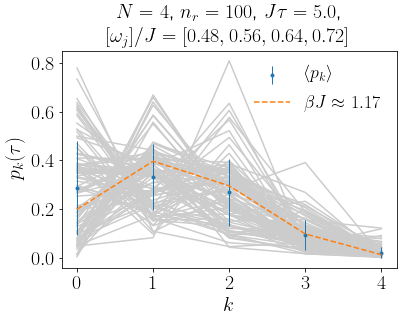

In [36]:
num_ind = 0
t_ind = 100
pb = []
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
for k in range(len(keys)):
    pb.append(np.real(p_th(k, num[num_ind], beta[num_ind], omegas[num_ind])))
p_thermal = np.array(pb)

fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$,\n'.format(time[t_ind])+r'$[\omega_j]/J = $'+' ${}$'.format(omegas_print[num_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], '-', color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr, elinewidth=1, label = r'$\langle p_k \rangle$') 
ax.plot(keys, p_thermal,  '--', color = 'tab:orange', zorder = nr + 1, label = r'$\beta J  \approx $'+' ${}$'.format(round(beta[num_ind], 2)))
#ax.plot(keys, p_inf(keys, num[num_ind]),  '-.', color = 'tab:red', zorder = nr + 1, label = r'$\beta J  \to +\infty$')
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}_omega_min={}_omega_max={}.svg'.format(num[num_ind], nr, time[t_ind], omega_min, omega_max))